In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.cluster import KMeans 
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import MinMaxScaler

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline

import sklearn.metrics as skmet

from sklearn.preprocessing import OneHotEncoder, StandardScaler, OrdinalEncoder,PowerTransformer
from sklearn.compose import ColumnTransformer 
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import ElasticNet
import joblib, pickle

In [2]:
df = pd.read_csv("C:\Mubarak\Projects\PROJECTS\EKINOX\student_drop_out_project\student_drop_out\data\exercice_data.csv")

<>:1: SyntaxWarning: invalid escape sequence '\M'
<>:1: SyntaxWarning: invalid escape sequence '\M'
C:\Users\mubar\AppData\Local\Temp\ipykernel_1548\2890446299.py:1: SyntaxWarning: invalid escape sequence '\M'
  df = pd.read_csv("C:\Mubarak\Projects\PROJECTS\EKINOX\student_drop_out_project\student_drop_out\data\exercice_data.csv")


In [3]:
df.shape
df.columns

Index(['StudentID', 'FirstName', 'FamilyName', 'sex', 'age', 'address',
       'famsize', 'Pstatus', 'Medu', 'Fedu', 'Mjob', 'Fjob', 'reason',
       'guardian', 'traveltime', 'studytime', 'failures', 'schoolsup',
       'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet',
       'romantic', 'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health',
       'absences', 'FinalGrade'],
      dtype='object')

In [4]:
#Drop columns 
df.drop('StudentID', inplace=True, axis=1)
df.drop('FirstName', inplace=True, axis=1)
df.drop('FamilyName', inplace=True, axis=1)
#df.drop('address', inplace=True, axis=1)
#df.drop('Mjob', inplace=True, axis=1)
#df.drop('schoolsup', inplace=True, axis=1)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 357 entries, 0 to 356
Data columns (total 30 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   sex         357 non-null    object
 1   age         357 non-null    int64 
 2   address     357 non-null    object
 3   famsize     357 non-null    object
 4   Pstatus     357 non-null    object
 5   Medu        357 non-null    int64 
 6   Fedu        357 non-null    int64 
 7   Mjob        357 non-null    object
 8   Fjob        357 non-null    object
 9   reason      357 non-null    object
 10  guardian    357 non-null    object
 11  traveltime  357 non-null    int64 
 12  studytime   357 non-null    int64 
 13  failures    357 non-null    int64 
 14  schoolsup   357 non-null    object
 15  famsup      357 non-null    object
 16  paid        357 non-null    object
 17  activities  357 non-null    object
 18  nursery     357 non-null    object
 19  higher      357 non-null    object
 20  internet  

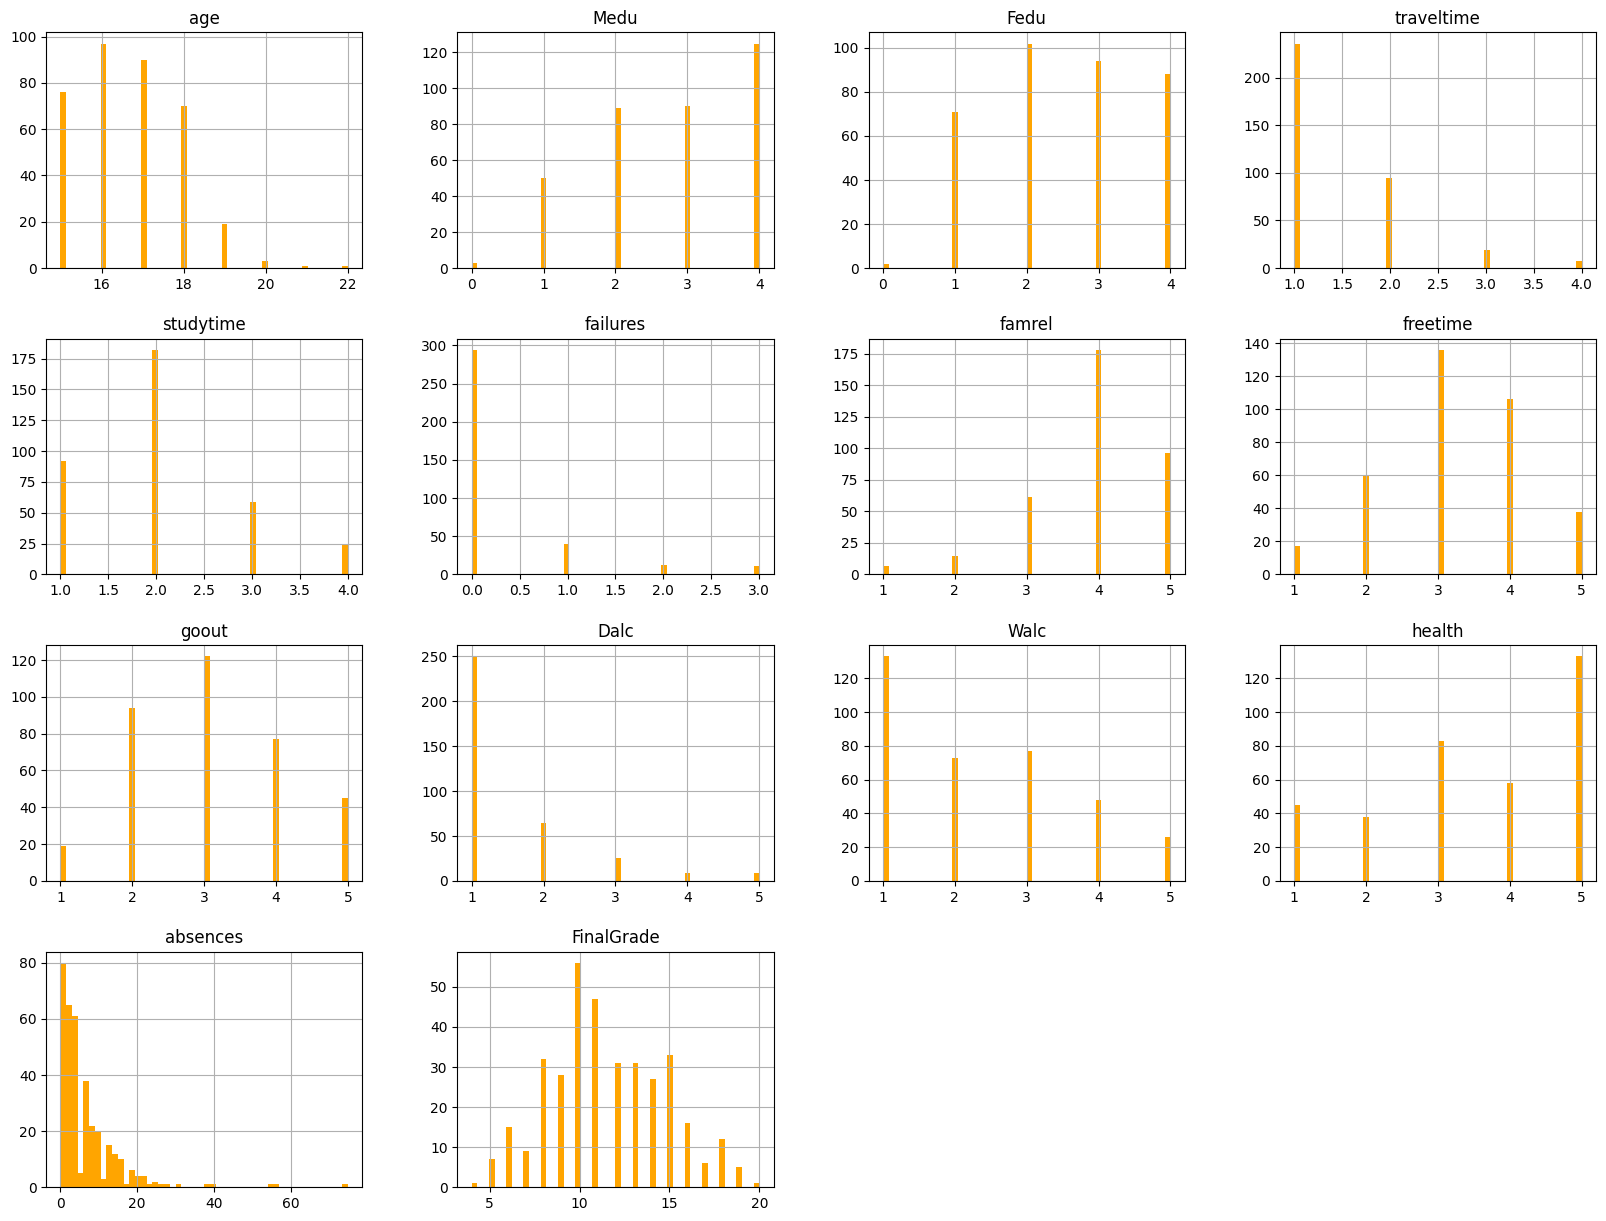

In [6]:
# Univariate analysis
import matplotlib.pyplot as plt 

df.hist(bins=50, figsize=(20,15), color = "orange")
plt.show()

In [7]:
#Draw scatter plot

In [8]:
y = df['FinalGrade'].values
X = df.drop('FinalGrade', axis=1)


In [9]:
 
type(y)

numpy.ndarray

In [10]:

type(X)


pandas.core.frame.DataFrame

In [11]:
y

array([ 6,  6, 10, 15, 10, 15, 11,  6, 19, 15,  9, 12, 14, 11, 16, 14, 14,
       10,  5, 10, 15, 15, 16, 12,  8,  8, 11, 15, 11, 11, 12, 17, 16, 12,
       15,  6, 18, 15, 11, 13, 11, 12, 18, 11,  9,  6, 11, 20, 14,  7, 13,
       13, 10, 11, 13, 10, 15, 15,  9, 16, 11, 11,  9,  9, 10, 15, 12,  6,
        8, 16, 15, 10,  5, 14, 11, 10, 10, 11, 10,  5, 12, 11,  6, 15, 10,
        8,  6, 14, 10,  7,  8, 18,  6, 10, 14, 10, 15, 10, 14,  8,  5, 17,
       14,  6, 18, 11,  8, 18, 13, 16, 19, 10, 13, 19,  9, 16, 14, 13,  8,
       13, 15, 15, 13, 13,  8, 12, 11,  9, 18, 12, 11, 12, 15,  9, 11, 13,
       11, 11, 10, 14, 10, 12,  8, 13, 10, 15, 12,  7, 10,  7, 12, 10, 16,
       14, 16, 10,  9,  9, 11,  6,  9, 11,  8, 12, 17,  8, 12, 11, 11, 15,
        9, 10, 13,  9,  8, 10, 14, 15, 16, 10, 18, 10, 16, 10, 10,  6, 11,
        9,  7, 13, 10,  7,  8, 13, 14,  8, 10, 15,  4,  8,  8, 10,  6, 17,
       13, 14,  7, 15, 12,  9, 12, 14, 11,  9, 13,  6, 10, 13, 12, 11, 12,
       12, 12, 18, 13,  8

In [12]:
X

,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,...,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences
0,F,18,U,GT3,A,4,4,at_home,teacher,course,...,yes,no,no,4,3,4,1,1,3,6
1,F,17,U,GT3,T,1,1,at_home,other,course,...,yes,yes,no,5,3,3,1,1,3,4
2,F,15,U,LE3,T,1,1,at_home,other,other,...,yes,yes,no,4,3,2,2,3,3,10
3,F,15,U,GT3,T,4,2,health,services,home,...,yes,yes,yes,3,2,2,1,1,5,2
4,F,16,U,GT3,T,3,3,other,other,home,...,yes,no,no,4,3,2,1,2,5,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
352,M,20,U,LE3,A,2,2,services,services,course,...,yes,no,no,5,5,4,4,5,4,11
353,M,17,U,LE3,T,3,1,services,services,course,...,yes,yes,no,2,4,5,3,4,2,3
354,M,21,R,GT3,T,1,1,other,other,course,...,yes,no,no,5,5,3,3,3,3,3
355,M,18,R,LE3,T,3,2,services,other,course,...,yes,yes,no,4,4,1,3,4,5,0


In [13]:
df.head()

,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,...,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,FinalGrade
0,F,18,U,GT3,A,4,4,at_home,teacher,course,...,no,no,4,3,4,1,1,3,6,6
1,F,17,U,GT3,T,1,1,at_home,other,course,...,yes,no,5,3,3,1,1,3,4,6
2,F,15,U,LE3,T,1,1,at_home,other,other,...,yes,no,4,3,2,2,3,3,10,10
3,F,15,U,GT3,T,4,2,health,services,home,...,yes,yes,3,2,2,1,1,5,2,15
4,F,16,U,GT3,T,3,3,other,other,home,...,no,no,4,3,2,1,2,5,4,10


In [14]:
num_features = [feature for feature in df.columns if df[feature].dtype != 'O']
print('Num of Numerical Features :', len(num_features), num_features)
cat_features = [feature for feature in df.columns if df[feature].dtype == 'O']
print('Num of Categorical Features :', len(cat_features), cat_features)
ordinal_features=[feature for feature in cat_features if len(df[feature].unique())<=2]
print('Num of ordinal_features  Features :',len(ordinal_features),ordinal_features)
categorical_features=[feature for feature in cat_features if feature not in ordinal_features]
print('Num of categorical_features Features :',len(categorical_features),categorical_features)

Num of Numerical Features : 14 ['age', 'Medu', 'Fedu', 'traveltime', 'studytime', 'failures', 'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences', 'FinalGrade']
Num of Categorical Features : 16 ['sex', 'address', 'famsize', 'Pstatus', 'Mjob', 'Fjob', 'reason', 'guardian', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic']
Num of ordinal_features  Features : 12 ['sex', 'address', 'famsize', 'Pstatus', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic']
Num of categorical_features Features : 4 ['Mjob', 'Fjob', 'reason', 'guardian']


In [15]:
for feature in cat_features:
    print(feature,':', df[feature].nunique())

sex : 2
address : 2
famsize : 2
Pstatus : 2
Mjob : 5
Fjob : 5
reason : 4
guardian : 3
schoolsup : 2
famsup : 2
paid : 2
activities : 2
nursery : 2
higher : 2
internet : 2
romantic : 2


In [16]:
num_features_cols = ['age', 'Medu', 'Fedu', 'traveltime', 'studytime', 'failures', 'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences']
categorical_features_cols_all = ['sex', 'address', 'famsize', 'Pstatus', 'Mjob', 'Fjob', 'reason', 'guardian', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic']
ordinal_features_cols =  ['sex', 'address', 'famsize', 'Pstatus', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic']
categorical_features_cols = [ 'Mjob', 'Fjob', 'reason', 'guardian']
transform_columns = ['absences', 'Fedu','studytime', 'failures', 'failures','famrel','freetime','Dalc']



numeric_transformer = StandardScaler()
onehot_transformer = OneHotEncoder()

preprocessor = ColumnTransformer(
    [  
        ("OneHotEncoder", onehot_transformer, categorical_features_cols_all),
        ("StandardScaler", numeric_transformer, num_features_cols)
    ]
)



In [17]:
processed = preprocessor.fit(X)



In [18]:
# from sklearn.linear_model import ElasticNet
# lr = ElasticNet(alpha=0.1, l1_ratio=0.5, random_state=42)
# one_hot = OneHotEncoder()
# hot1 = one_hot(categorical_features_cols_all)
# stand = StandardScaler(num_features_cols)
# pipeline = make_pipeline( one_hot, stand, lr)
# #passing raw data to pipeline
# processed_obj = pipeline.fit(X)
# #Apply the pipeline on dataset 

# processed_obj

In [19]:
    [  
        ("OneHotEncoder", onehot_transformer, categorical_features_cols_all),
        ("StandardScaler", numeric_transformer, num_features_cols)
    ]

[('OneHotEncoder',
  OneHotEncoder(),
  ['sex',
   'address',
   'famsize',
   'Pstatus',
   'Mjob',
   'Fjob',
   'reason',
   'guardian',
   'schoolsup',
   'famsup',
   'paid',
   'activities',
   'nursery',
   'higher',
   'internet',
   'romantic']),
 ('StandardScaler',
  StandardScaler(),
  ['age',
   'Medu',
   'Fedu',
   'traveltime',
   'studytime',
   'failures',
   'famrel',
   'freetime',
   'goout',
   'Dalc',
   'Walc',
   'health',
   'absences'])]

In [20]:
# import joblib
# #joblib.dump(processed, 'job.joblib')

# import os 
# os.getcwd()

In [21]:
X = pd.DataFrame(processed.transform(X))


In [22]:
processed

ColumnTransformer(transformers=[('OneHotEncoder', OneHotEncoder(),
                                 ['sex', 'address', 'famsize', 'Pstatus',
                                  'Mjob', 'Fjob', 'reason', 'guardian',
                                  'schoolsup', 'famsup', 'paid', 'activities',
                                  'nursery', 'higher', 'internet',
                                  'romantic']),
                                ('StandardScaler', StandardScaler(),
                                 ['age', 'Medu', 'Fedu', 'traveltime',
                                  'studytime', 'failures', 'famrel', 'freetime',
                                  'goout', 'Dalc', 'Walc', 'health',
                                  'absences'])])

In [23]:
X


,0,1,2,3,4,5,6,7,8,9,...,44,45,46,47,48,49,50,51,52,53
0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,...,0.829976,-0.050578,-0.405047,0.050671,-0.244014,0.828056,-0.539734,-1.028900,-0.391969,-0.038713
1,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,...,-0.629637,-0.050578,-0.405047,1.181279,-0.244014,-0.090006,-0.539734,-1.028900,-0.391969,-0.283327
2,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,...,-0.629637,-0.050578,4.067169,0.050671,-0.244014,-1.008069,0.548883,0.517699,-0.391969,0.450515
3,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,...,-0.629637,1.153183,-0.405047,-1.079936,-1.233933,-1.008069,-0.539734,-1.028900,1.035917,-0.527941
4,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,...,-0.629637,-0.050578,-0.405047,0.050671,-0.244014,-1.008069,-0.539734,-0.255601,1.035917,-0.283327
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
352,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,...,-0.629637,-0.050578,2.576431,1.181279,1.735824,0.828056,2.726117,2.064299,0.321974,0.572822
353,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.829976,-1.254340,-0.405047,-2.210544,0.745905,1.746119,1.637500,1.290999,-1.105912,-0.405634
354,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,-0.629637,-1.254340,4.067169,1.181279,1.735824,-0.090006,1.637500,0.517699,-0.391969,-0.405634
355,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,2.289589,-1.254340,-0.405047,0.050671,0.745905,-1.926131,1.637500,1.290999,1.035917,-0.772555


In [24]:
y

array([ 6,  6, 10, 15, 10, 15, 11,  6, 19, 15,  9, 12, 14, 11, 16, 14, 14,
       10,  5, 10, 15, 15, 16, 12,  8,  8, 11, 15, 11, 11, 12, 17, 16, 12,
       15,  6, 18, 15, 11, 13, 11, 12, 18, 11,  9,  6, 11, 20, 14,  7, 13,
       13, 10, 11, 13, 10, 15, 15,  9, 16, 11, 11,  9,  9, 10, 15, 12,  6,
        8, 16, 15, 10,  5, 14, 11, 10, 10, 11, 10,  5, 12, 11,  6, 15, 10,
        8,  6, 14, 10,  7,  8, 18,  6, 10, 14, 10, 15, 10, 14,  8,  5, 17,
       14,  6, 18, 11,  8, 18, 13, 16, 19, 10, 13, 19,  9, 16, 14, 13,  8,
       13, 15, 15, 13, 13,  8, 12, 11,  9, 18, 12, 11, 12, 15,  9, 11, 13,
       11, 11, 10, 14, 10, 12,  8, 13, 10, 15, 12,  7, 10,  7, 12, 10, 16,
       14, 16, 10,  9,  9, 11,  6,  9, 11,  8, 12, 17,  8, 12, 11, 11, 15,
        9, 10, 13,  9,  8, 10, 14, 15, 16, 10, 18, 10, 16, 10, 10,  6, 11,
        9,  7, 13, 10,  7,  8, 13, 14,  8, 10, 15,  4,  8,  8, 10,  6, 17,
       13, 14,  7, 15, 12,  9, 12, 14, 11,  9, 13,  6, 10, 13, 12, 11, 12,
       12, 12, 18, 13,  8

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)


In [26]:
print(X_train.shape,X_test.shape, y_train.shape,y_test.shape)

(285, 54) (72, 54) (285,) (72,)


In [27]:
from sklearn.linear_model import ElasticNet
lr = ElasticNet(alpha=0.1, l1_ratio=0.5, random_state=42)
lr_model = lr.fit(X_train, y_train)


from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

In [28]:
X1 = df.drop('FinalGrade', axis=1)

preprocessor = ColumnTransformer(transformers = [('onehot', onehot_transformer, categorical_features_cols_all)])
print(preprocessor)

preprocessor1 = ColumnTransformer(transformers = [('StandardSc', numeric_transformer, num_features_cols)])
print(preprocessor1)

OnehotPreproce = preprocessor.fit(X1)
 
StandardPreproce = preprocessor1.fit(X1) 
 
joblib.dump(OnehotPreproce, 'OnehotPreproce.joblib')
joblib.dump(StandardPreproce, 'StandardPreproce.joblib')
joblib.dump(lr_model, open('lr_models.joblib', 'wb'))

ColumnTransformer(transformers=[('onehot', OneHotEncoder(),
                                 ['sex', 'address', 'famsize', 'Pstatus',
                                  'Mjob', 'Fjob', 'reason', 'guardian',
                                  'schoolsup', 'famsup', 'paid', 'activities',
                                  'nursery', 'higher', 'internet',
                                  'romantic'])])
ColumnTransformer(transformers=[('StandardSc', StandardScaler(),
                                 ['age', 'Medu', 'Fedu', 'traveltime',
                                  'studytime', 'failures', 'famrel', 'freetime',
                                  'goout', 'Dalc', 'Walc', 'health',
                                  'absences'])])


In [29]:
def eval_metrics(actual, pred):
    rmse = np.sqrt(mean_squared_error(actual, pred))
    mae = mean_absolute_error(actual, pred)
    r2 = r2_score(actual, pred)

    return rmse, mae, r2

In [30]:
import pickle

#pickle.dump(lr_model, open('lr.pkl', 'wb')) #wb = write in binary format to the file knn.pkl

predicted_value = lr.predict(X_test)
predicted_value

array([13.91501451, 13.78484418, 11.34958664, 11.81466734, 14.0732081 ,
       10.91988185, 12.25146828, 12.14922416,  8.09779235, 12.04851317,
       11.94255925, 10.5377595 , 12.82537317, 11.75774917, 12.34338046,
       12.64531348, 12.81016297, 11.88590446,  9.3876    , 11.92934268,
       11.48549434, 11.1051914 , 12.05863829, 14.03142613, 11.69536061,
       11.11425851,  8.05546819, 11.73159602,  9.12455058, 11.84115441,
       11.22119237, 13.23050795, 10.60354675, 12.18203194, 12.75207885,
        9.94324663, 13.14857598, 13.06029187, 13.14456795, 12.12390572,
       10.17025383, 12.86523563, 11.82529746, 11.75449629, 12.03126372,
       10.77091112, 12.04344518, 12.94639354, 10.83384001, 13.03718055,
       12.88258066, 12.44350576, 10.1099969 ,  8.0618534 , 11.1949517 ,
       10.98755158, 12.73411802, 12.95662528, 13.4068646 , 11.5375784 ,
       10.01216381, 10.5552609 ,  9.24490954, 12.97198574,  7.11762356,
       11.64362199, 12.57866456, 12.27250436, 12.56520597, 12.86

In [31]:
(rmse, mae, r2) = eval_metrics(y_test, predicted_value)
print("rmse = ", rmse)
print("mae = ", mae)
print("r2 = ", r2)

rmse =  2.651166811425493
mae =  2.191042093187091
r2 =  0.2704341862717735


In [32]:
X1 = df.drop('FinalGrade', axis=1)
pipeline_beforefit2 = make_pipeline(preprocessor,lr)
pipeline_beforefit = pipeline_beforefit2.fit(X1,y)
joblib.dump(pipeline_beforefit, 'mypipelinebeforefit.joblib')

['mypipelinebeforefit.pkl']

In [33]:
joblib.dump(lr, 'lrmodel.pkl')

['lrmodel.pkl']

In [34]:
X2 = df.drop('FinalGrade', axis=1)
pipeline_afterfit1 = make_pipeline(processed,lr)
pipeline_afterfit = pipeline_afterfit1.fit(X2,y)
joblib.dump(pipeline_afterfit, 'mypipelineafterfit.pkl')

['mypipelineafterfit.pkl']

In [35]:
%pwd

'c:\\Mubarak\\Projects\\PROJECTS\\EKINOX\\student_drop_out_project\\student_drop_out\\research'

In [36]:
object_beforefit = joblib.load('my_pipeline_beforefit.pkl')
object_afterfit = joblib.load('my_pipeline_afterfit.pkl')

In [37]:
object_beforefit 

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('OneHotEncoder',
                                                  OneHotEncoder(),
                                                  ['sex', 'address', 'famsize',
                                                   'Pstatus', 'Mjob', 'Fjob',
                                                   'reason', 'guardian',
                                                   'schoolsup', 'famsup',
                                                   'paid', 'activities',
                                                   'nursery', 'higher',
                                                   'internet', 'romantic']),
                                                 ('StandardScaler',
                                                  StandardScaler(),
                                                  ['age', 'Medu', 'Fedu',
                                                   'traveltime', 'studytime',
                                                   'failures', 'famrel',
                                                   'freetime', 'goout', 'Dalc',
                                                   'Walc', 'health',
                                                   'absences'])])),
                ('elasticnet', ElasticNet(alpha=0.1, random_state=42))])

In [38]:
object_afterfit

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('OneHotEncoder',
                                                  OneHotEncoder(),
                                                  ['sex', 'address', 'famsize',
                                                   'Pstatus', 'Mjob', 'Fjob',
                                                   'reason', 'guardian',
                                                   'schoolsup', 'famsup',
                                                   'paid', 'activities',
                                                   'nursery', 'higher',
                                                   'internet', 'romantic']),
                                                 ('StandardScaler',
                                                  StandardScaler(),
                                                  ['age', 'Medu', 'Fedu',
                                                   'traveltime', 'studytime',
                                                   'failures', 'famrel',
                                                   'freetime', 'goout', 'Dalc',
                                                   'Walc', 'health',
                                                   'absences'])])),
                ('elasticnet', ElasticNet(alpha=0.1, random_state=42))])

In [39]:
X3 = df.drop('FinalGrade', axis=1)
pca_fit = object_beforefit.predict(X3)
#pca_res1 = object_beforefit.predict(pca_fit)
pca_fit
 

array([11.06609989, 11.56291961,  7.61335422, 13.09234815, 11.44522505,
       12.90005884, 12.45412925, 10.81551375, 13.91967605, 13.11291741,
       12.70372008, 13.02464228, 12.48894708, 12.76319578, 13.17005087,
       12.3535554 , 13.16241075, 10.53373883,  8.15409823, 12.46396111,
       14.64403859, 13.29266609, 13.38512138, 11.29315809, 11.34306002,
        9.34199225, 11.62899174, 12.52440391, 11.70075746, 10.96678686,
       13.1259697 , 14.35170695, 13.07058667, 13.72813724, 11.73507882,
       11.94774784, 13.47080552, 12.794789  , 11.56566211, 10.15772889,
        9.59503472, 11.92207294, 13.94298976, 12.47057922,  8.78565675,
       10.50596049, 10.47244588, 14.88070607, 12.09686514, 11.18872584,
       11.90936615, 12.48001393, 10.81466213, 10.45326927, 11.39363151,
       11.349981  , 13.83115237, 12.97662976, 10.75003693, 12.73206447,
       11.9589381 ,  8.61726763, 10.76178422, 10.24242341, 11.69091706,
       12.83544245, 12.88959409, 11.05107661, 10.08263068, 11.95

In [40]:
X2 = df.drop('FinalGrade', axis=1)
pca_res2 = object_afterfit.predict(X2)
 

pca_res2

array([11.06609989, 11.56291961,  7.61335422, 13.09234815, 11.44522505,
       12.90005884, 12.45412925, 10.81551375, 13.91967605, 13.11291741,
       12.70372008, 13.02464228, 12.48894708, 12.76319578, 13.17005087,
       12.3535554 , 13.16241075, 10.53373883,  8.15409823, 12.46396111,
       14.64403859, 13.29266609, 13.38512138, 11.29315809, 11.34306002,
        9.34199225, 11.62899174, 12.52440391, 11.70075746, 10.96678686,
       13.1259697 , 14.35170695, 13.07058667, 13.72813724, 11.73507882,
       11.94774784, 13.47080552, 12.794789  , 11.56566211, 10.15772889,
        9.59503472, 11.92207294, 13.94298976, 12.47057922,  8.78565675,
       10.50596049, 10.47244588, 14.88070607, 12.09686514, 11.18872584,
       11.90936615, 12.48001393, 10.81466213, 10.45326927, 11.39363151,
       11.349981  , 13.83115237, 12.97662976, 10.75003693, 12.73206447,
       11.9589381 ,  8.61726763, 10.76178422, 10.24242341, 11.69091706,
       12.83544245, 12.88959409, 11.05107661, 10.08263068, 11.95

In [41]:
joblib.dump(processed,"processed.pkl")
joblib.dump(lr,"lr.pkl")
processed_obj = joblib.load('processed.pkl')
lr_obj = joblib.load('lr.pkl')


In [42]:
X4 = df.drop('FinalGrade', axis=1)
obj_fit = processed_obj.transform(X4)
pca_fit = object_beforefit.predict(obj_fit)
pca_fit

ValueError: X has 54 features, but ColumnTransformer is expecting 29 features as input.